# Classificação Multiclasse com Fashion MNIST


Vamos criar uma rede neural para o problema de classificação multiclasse com o conjunto de dados Fashion MNIST.
Esse dataset contém imagens de roupas, classificadas em 10 categorias distintas, como camisetas, calças, sapatos, entre outras.


In [1]:

import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import Accuracy
import matplotlib.pyplot as plt


np.random.seed(42)
tf.random.set_seed(42)
init = tf.keras.initializers.GlorotUniform(seed=42)



### Preparação dos Dados
O primeiro passo é carregar o dataset **Fashion MNIST** e preparar os dados para a rede neural. O dataset já está disponível na Keras, então podemos carregá-lo facilmente.


#### Justificativa One Hot Encoding

*Vamos agora analisar as etapas de pré-processamento que realizamos nos dados antes de treinarmos o modelo.*

**Carregamento do Dataset**

*Primeiro, carregamos o dataset **Fashion MNIST**, que contém imagens de roupas em tons de cinza e suas respectivas classes. A função **`fashion_mnist.load_data()`** divide automaticamente o conjunto em dados de **treinamento** e **teste**, o que nos permite avaliar o desempenho do modelo em dados que ele não viu durante o treinamento.*

**Normalização dos Dados**

*Após carregar os dados, o próximo passo é a **normalização**. As imagens no Fashion MNIST têm valores de pixel que variam de **0 a 255**. Para facilitar o treinamento da rede neural e garantir que todas as entradas tenham a mesma escala, **normalizamos os dados** dividindo cada valor de pixel por **255**.*

*Esse processo transforma os valores de pixel para o intervalo **[0, 1]**, o que ajuda a rede neural a aprender de maneira mais eficiente, pois os valores dos dados ficam dentro de uma escala comum. Isso também evita problemas como a **explosão de gradientes**, que podem ocorrer quando as entradas têm escalas muito diferentes.*

**One-Hot Encoding**

*Em seguida, precisamos transformar os rótulos de classe, que inicialmente são números inteiros (0 a 9), em uma representação mais adequada para a rede neural. A técnica que usamos aqui é o **One-Hot Encoding**, que converte cada rótulo em um vetor binário.*

*Por exemplo, se tivermos 10 classes, o rótulo **3** será transformado no vetor **[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]**, onde o **1** na posição 3 indica que a amostra pertence à classe 3. Isso é importante porque, ao usar uma função de ativação **softmax** na camada de saída, o modelo irá gerar uma distribuição de probabilidades para cada classe. O **One-Hot Encoding** permite que o modelo aprenda essas probabilidades de maneira mais eficaz.*

*Portanto, essas transformações são essenciais para garantir que os dados estejam adequados para o treinamento do modelo. A normalização melhora a eficiência do aprendizado, e o **One-Hot Encoding** garante que o modelo possa lidar adequadamente com a classificação multiclasse.*

#### Código

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


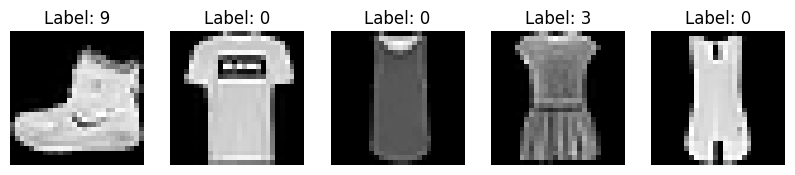

In [2]:
# Carregando o dataset Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalizando os dados (de 0-255 para 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertendo os rótulos para One-Hot Encoding
y_train_ohe = to_categorical(y_train, 10)
y_test_ohe = to_categorical(y_test, 10)

# Exibindo as 5 primeiras imagens de treino
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()



### Arquitetura do Modelo

Agora, vamos criar a arquitetura da nossa rede neural. Vamos usar uma **rede neural totalmente conectada (MLP)** com 2 camadas ocultas. Para a camada de saída, vamos usar **softmax**, pois é um problema de **classificação multiclasse**.


#### Definindo Arquitetura

*Vamos agora explorar como construir uma rede neural para o problema de **classificação multiclasse** utilizando o conjunto de dados **Fashion MNIST**. Esse dataset contém imagens de roupas, classificadas em 10 categorias distintas, como camisetas, calças, sapatos, entre outras.*

**Objetivo da Arquitetura**
- *Nosso objetivo é construir uma rede neural que consiga classificar corretamente essas imagens de roupas em suas respectivas categorias. O Fashion MNIST é composto por imagens em **tons de cinza (grayscale)** com **28x28 pixels**, que serão transformadas em vetores de **784 valores** (28 * 28) para alimentar a rede neural.*

**Camada de Entrada**
- *A primeira camada que definimos é a camada de entrada. Como cada imagem foi achatada para um vetor de **784 características** (pixels), nossa camada de entrada precisa ter **784 neurônios**, um para cada característica. Isso é necessário para representar cada pixel da imagem em uma rede neural de forma eficiente.*

**Camadas Ocultas**
- *Em seguida, adicionamos duas camadas ocultas, uma com **128 neurônios** e a outra com **64 neurônios**, ambas utilizando a função de ativação **ReLU**. A função **ReLU** foi escolhida porque ela é eficiente e ajuda a resolver o problema de **vanishing gradients**, o que pode ocorrer com funções como **sigmoid** e **tanh**. Ela introduz não-linearidade no modelo, permitindo que a rede aprenda padrões complexos nas imagens.*

- *O número de neurônios nas camadas ocultas foi definido de maneira incremental. Começamos com 128 neurônios na primeira camada e 64 na segunda camada, o que segue a ideia de uma arquitetura **piramidal**, onde o número de neurônios diminui à medida que avançamos pelas camadas.*

**Camada de Saída**
- **"A camada de saída é uma camada densa com **10 neurônios**, correspondendo às **10 categorias** das roupas no Fashion MNIST. Para esse tipo de problema de **classificação multiclasse**, usamos a função de ativação **softmax**, que transforma a saída da rede em **probabilidades** para cada classe, garantindo que a soma das probabilidades seja igual a 1."**

- **"A função **softmax** foi escolhida porque ela é ideal para problemas de classificação multiclasse exclusiva, onde cada amostra pertence a exatamente uma classe entre as 10 possíveis."**

**Função de Perda e Métricas**
- **"Como estamos lidando com um problema de **classificação multiclasse**, utilizamos a função de perda **sparse categorical crossentropy**. Ela é usada quando os rótulos são **inteiros** e não codificados em **one-hot**. Isso torna o processo mais eficiente, já que a codificação **one-hot** não é necessária."**

- **"Além disso, a métrica escolhida para avaliação do modelo é a **acurácia**, que nos informa a proporção de previsões corretas feitas pela rede."**

**Justificativa para a Arquitetura**
- **"A escolha dessa arquitetura foi baseada em boas práticas para problemas de classificação de imagens simples, como o **Fashion MNIST**. Utilizamos uma **rede neural densa (MLP)**, que é eficaz para tarefas de classificação quando a entrada foi pré-processada (como no caso do **achatamento das imagens**)."**

- **"Começamos com uma arquitetura simples, mas poderosa, com duas camadas ocultas. Para tarefas mais complexas, poderíamos adicionar mais camadas ou neurônios, mas como estamos lidando com imagens de baixa resolução e um número reduzido de classes, essa arquitetura é adequada."**

**Conclusão**
- **"Em resumo, a arquitetura que escolhemos é simples, eficiente e segue as melhores práticas para o problema de classificação multiclasse. A camada de entrada com 784 neurônios mapeia os pixels das imagens, as camadas ocultas com **ReLU** aprendem representações não-lineares e a camada de saída com **softmax** gera as probabilidades para cada classe. Agora estamos prontos para treinar o modelo e avaliar seu desempenho."**

#### Código

In [3]:
# Criando o modelo
modelo = Sequential()
modelo.add(Input(shape=(784,)))  # Flatten a entrada para um vetor de 784 elementos (28x28 pixels)
modelo.add(Dense(64, activation='relu', kernel_initializer=init))  # Segunda camada densa com 64 neurônios e ReLU
modelo.add(Dense(10, activation='softmax', kernel_initializer=init))  # Camada de saída com 10 neurônios (uma para cada classe)

# Compilando o modelo
modelo.compile(optimizer=Adam(learning_rate=0.0005), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Resumo da arquitetura
modelo.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)


### Treinamento do Modelo

Agora, vamos treinar o modelo com os dados de treino. Vamos usar **100 épocas** e **batch_size=32**.


Epoch 1/100
1875/1875 - 10s - 5ms/step - accuracy: 0.8109 - loss: 0.5553 - val_accuracy: 0.8354 - val_loss: 0.4633
Epoch 2/100
1875/1875 - 5s - 3ms/step - accuracy: 0.8570 - loss: 0.4137 - val_accuracy: 0.8474 - val_loss: 0.4255
Epoch 3/100
1875/1875 - 6s - 3ms/step - accuracy: 0.8678 - loss: 0.3770 - val_accuracy: 0.8548 - val_loss: 0.4051
Epoch 4/100
1875/1875 - 5s - 2ms/step - accuracy: 0.8749 - loss: 0.3520 - val_accuracy: 0.8590 - val_loss: 0.3941
Epoch 5/100
1875/1875 - 6s - 3ms/step - accuracy: 0.8803 - loss: 0.3324 - val_accuracy: 0.8638 - val_loss: 0.3792
Epoch 6/100
1875/1875 - 5s - 3ms/step - accuracy: 0.8858 - loss: 0.3172 - val_accuracy: 0.8659 - val_loss: 0.3689
Epoch 7/100
1875/1875 - 5s - 2ms/step - accuracy: 0.8893 - loss: 0.3046 - val_accuracy: 0.8656 - val_loss: 0.3651
Epoch 8/100
1875/1875 - 6s - 3ms/step - accuracy: 0.8932 - loss: 0.2946 - val_accuracy: 0.8693 - val_loss: 0.3561
Epoch 9/100
1875/1875 - 10s - 5ms/step - accuracy: 0.8964 - loss: 0.2854 - val_accuracy

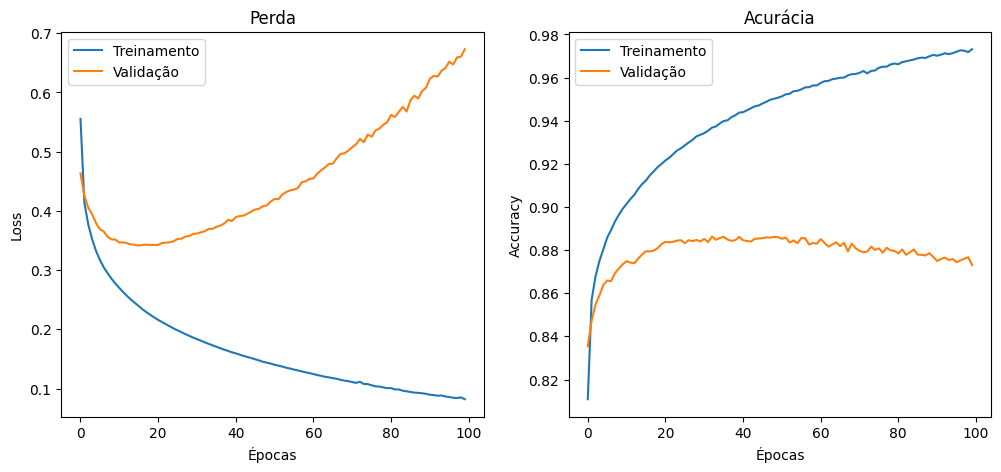

In [4]:
# Treinando o modelo
historico = modelo.fit(X_train.reshape(-1, 784), y_train,
                       validation_data=(X_test.reshape(-1, 784), y_test),
                       epochs=100, batch_size=32, verbose=2)

# Plotando o gráfico de perda (loss) e acurácia (accuracy)
plt.figure(figsize=(12, 5))

# Gráfico de perda
plt.subplot(1, 2, 1)
plt.plot(historico.history['loss'], label='Treinamento')
plt.plot(historico.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Gráfico de acurácia
plt.subplot(1, 2, 2)
plt.plot(historico.history['accuracy'], label='Treinamento')
plt.plot(historico.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



### Avaliação do Modelo

Agora, vamos avaliar o desempenho do modelo nos dados de teste. Isso nos dará uma ideia de como o modelo generaliza para novos dados.


In [5]:

# Avaliação do modelo
score = modelo.evaluate(X_test.reshape(-1, 784), y_test, verbose=0)
print(f'Perda no teste: {score[0]}')
print(f'Acurácia no teste: {score[1]}')


Perda no teste: 0.6729756593704224
Acurácia no teste: 0.8730999827384949
